# Detecting Spam SMS using Natural Language Processing
The dataset has been obtained fromhttps://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud

## Importing the data and pre-processing

In [5]:
df = pd.read_csv("drive/MyDrive/NLP /spam.csv" , encoding='ISO-8859-1')

In [7]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [8]:
#drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns = ['labels', 'data']

In [11]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# Create binary labels
df['b_labels'] = df.labels.map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

## Splitting data into training and test sets

In [20]:
# Train test split
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y,test_size=0.33)

## Building feature vectors using TfIdf/ Count Vectorizer

In [42]:
# try multiple ways of calculating features
'''tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test) '''

count_vectorizer = CountVectorizer(decode_error='ignore')
X_train = count_vectorizer.fit_transform(df_train)
X_test = count_vectorizer.transform(df_test)

In [18]:
X_train

<3733x7034 sparse matrix of type '<class 'numpy.int64'>'
	with 49325 stored elements in Compressed Sparse Row format>

## Modelling the data

In [58]:
# training model and obtaining accuracy
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
print("train score :", model.score(X_train, Y_train))
print("test score:", model.score(X_test, Y_test))

train score : 0.98124832574337
test score: 0.9728113104948342


In [57]:
# training model and obtaining accuracy
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print("train score :", model.score(X_train, Y_train))
print("test score:", model.score(X_test, Y_test))

train score : 1.0
test score: 0.9755301794453507


In [48]:
# training model and obtaining accuracy
model = MultinomialNB()
model.fit(X_train, Y_train)
print("train score :", model.score(X_train, Y_train))
print("test score:", model.score(X_test, Y_test))

train score : 0.994106616662202
test score: 0.9885807504078303


In [27]:
models = {"MultinomialNB": MultinomialNB(),
          "AdaBoost Classifier": AdaBoostClassifier(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
   
    np.random.seed(1234)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
       
        model.fit(X_train, Y_train)
        
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [54]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)
model_scores

{'AdaBoost Classifier': 0.9728113104948342,
 'MultinomialNB': 0.9885807504078303,
 'Random Forest': 0.9760739532354541}

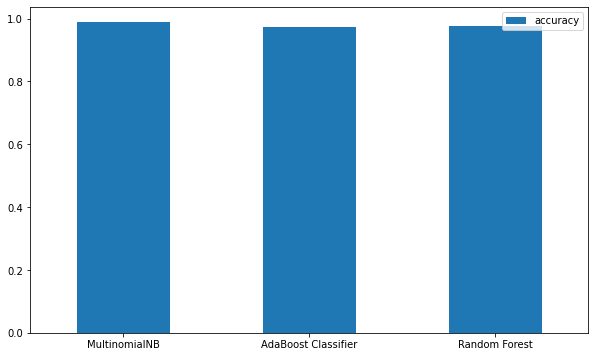

In [56]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
plot = model_compare.T.plot.bar(figsize=(10,6),rot=0)

## Visualizing data

In [37]:
# Visualize the data
def visualize(label):
  words=' '
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words+= msg + ' '
  wordcloud = WordCloud(width=900, height = 700).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

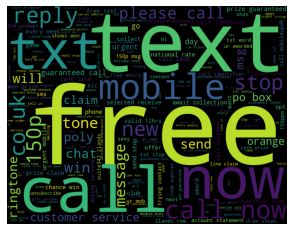

In [38]:
visualize('spam')

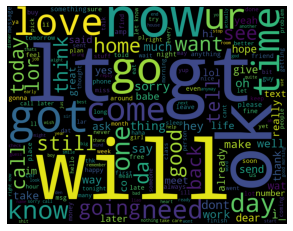

In [39]:
visualize('ham')

## Observing misclassified messages
Let us go through the messages that were misclassified by the model and try to understand why the messages were not identified currently by analysing the text in them.

In [49]:
X = count_vectorizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [52]:
# things that should be spam
undetected_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in undetected_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
For sale - arsenal dartboard. Good condition but no doubles or trebles!
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Callså£1/minMobsmoreLKPOBOX177HP

In [53]:
# things that should not be spam
undetected_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in undetected_spam:
  print(msg)

Finally the match heading towards draw as your prediction.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
I liked the new mobile
Anytime...
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


We can observe as we read the text messages that the messages that have been mislabeled can be deceptive even to humans at first glance and hence they are incorrectly labeled by the model. 

***